In [1]:
from MRF import *
import matplotlib.pyplot as plt

In [2]:
%load_ext line_profiler

In [7]:
%lprun -f MRF._splitter_mrf MRF._one_MRF_tree()

Timer unit: 1e-06 s

Total time: 0.967718 s
File: /Users/ryanlucas/Desktop/MacroRandomForest/MRF.py
Function: _splitter_mrf at line 738

Line #      Hits         Time  Per Hit   % Time  Line Contents
   738                                               def _splitter_mrf(self, x):
   739                                           
   740        80        303.0      3.8      0.0          cons_w = 0.01
   741                                           
   742        80       7725.0     96.6      0.8          uni_x = np.unique(x)
   743                                           
   744        80       2930.0     36.6      0.3          x = np.array(x)
   745                                           
   746        80       1022.0     12.8      0.1          x_indices = [i for i in range(len(x))]
   747                                           
   748        80        987.0     12.3      0.1          splits = sorted(uni_x)
   749                                           
   750       160     

In [4]:
data_in = pd.read_csv("/Users/ryanlucas/Desktop/MRF/MRF_data.csv")

In [5]:
MRF = MacroRandomForest(data=data_in,y_pos=0,x_pos=np.arange(1,4), oos_pos=np.arange(150,200),trend_push=4,quantile_rate=0.3, print_b = True)

In [6]:
mrf_output = MRF._ensemble_loop()

Tree 0 out of 50


/Users/ryanlucas/Desktop/MacroRandomForest/MRF.py:300: RuntimeWarning: divide by zero encountered in long_scalars
  self.avg_beta = ((b-1)/b)*np.array(self.avg_pred) + \
/Users/ryanlucas/Desktop/MacroRandomForest/MRF.py:301: RuntimeWarning: divide by zero encountered in long_scalars
  (1/b)*self.rt_output['pred']
/Users/ryanlucas/Desktop/MacroRandomForest/MRF.py:300: RuntimeWarning: invalid value encountered in add
  self.avg_beta = ((b-1)/b)*np.array(self.avg_pred) + \


Tree 1 out of 50
Tree 2 out of 50
Tree 3 out of 50
Tree 4 out of 50
Tree 5 out of 50
Tree 6 out of 50
Tree 7 out of 50


KeyboardInterrupt: 

In [ ]:
y = np.array(mrf_output['YandX'].iloc[150:, 0])

In [ ]:
phils_preds = pd.read_csv("/Users/ryanlucas/Desktop/MRF/predictions.csv", index_col = "Unnamed: 0")

In [ ]:
my_preds = pd.DataFrame(mrf_output['pred_ensemble'])

In [ ]:
my_preds.columns = np.arange(150, 200)

In [ ]:
phils_betas.columns = my_betas.columns

In [ ]:
phils_betas = pd.read_csv("/Users/ryanlucas/Desktop/MRF/MRF_betas.csv", index_col = "Unnamed: 0")

In [ ]:
my_betas = pd.DataFrame(mrf_output['betas'])

In [ ]:
phils_betas.index = my_betas.index

In [ ]:
phils_betas.columns = my_betas.columns

In [ ]:
abs(my_betas.subtract(phils_betas)).describe()

,0,1,2,3
count,200.000000,200.000000,200.000000,200.000000
mean,0.026359,0.030061,0.033479,0.027350
std,0.019858,0.023092,0.025940,0.021968
min,0.000048,0.000231,0.000424,0.000250
25%,0.011283,0.010300,0.013518,0.010624
50%,0.021977,0.026556,0.027362,0.020528
75%,0.034665,0.042907,0.045811,0.038543
max,0.103771,0.138046,0.147516,0.097334


Text(0, 0.5, 'Coefficient')

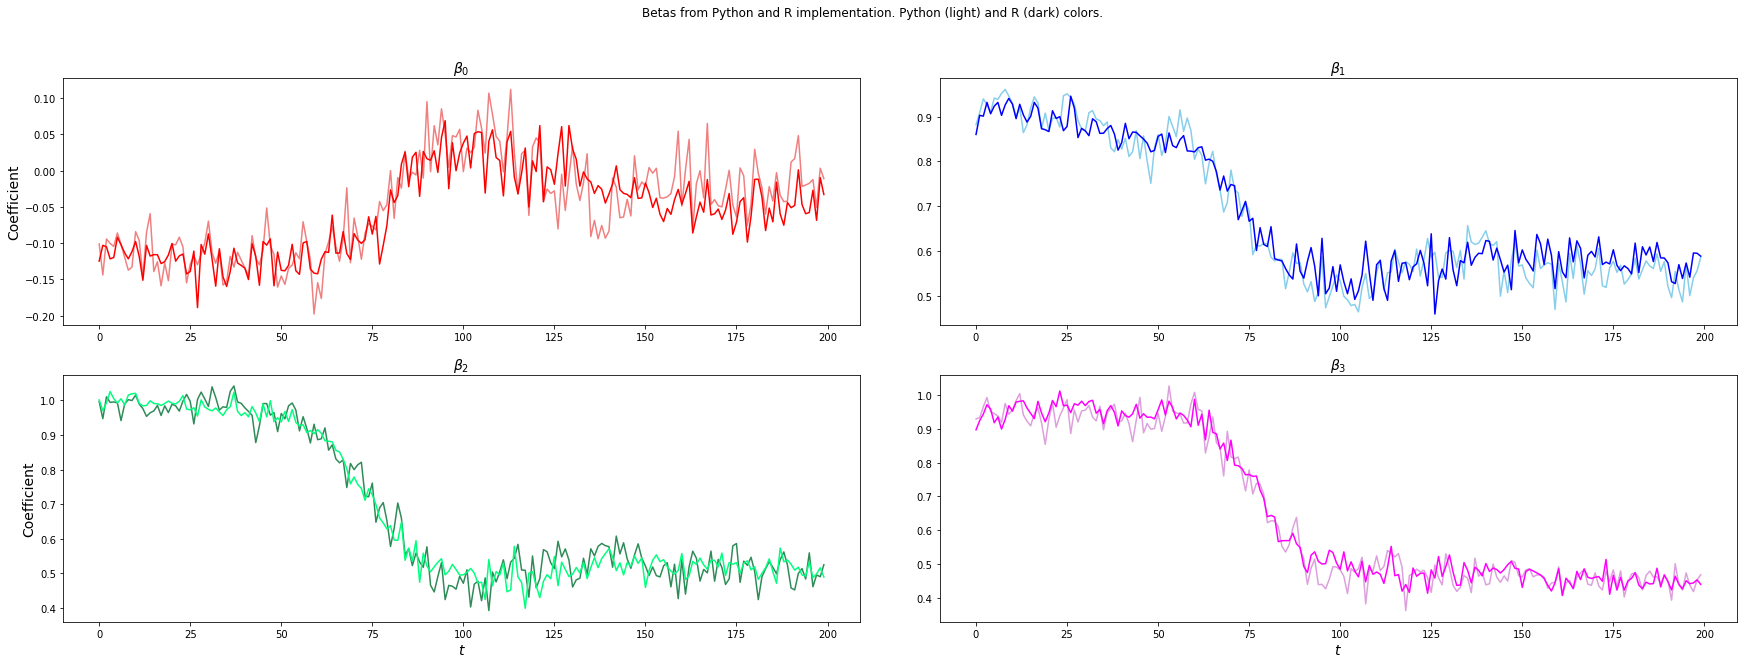

In [ ]:
fig, ax =plt.subplots(nrows = 2, ncols = 2, gridspec_kw={"wspace": 0.1})

plt.suptitle("Betas from Python and R implementation. Python (light) and R (dark) colors.")

color_list_0 = ['lightcoral', 'skyblue', 'seagreen', 'plum']
color_list_1 = ['red', 'blue', 'springgreen', 'magenta']

plt.rcParams['figure.figsize'] = (30, 10)
ax[0, 0].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 0], color = color_list_0[0])
ax[0, 0].plot(pd.DataFrame(phils_betas).iloc[:, 0], color_list_1[0])

ax[0, 1].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 1], color = color_list_0[1])
ax[0, 1].plot(pd.DataFrame(phils_betas).iloc[:, 1], color_list_1[1])

ax[1, 0].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 2], color = color_list_0[2])
ax[1, 0].plot(pd.DataFrame(phils_betas).iloc[:, 2], color_list_1[2])

ax[1, 1].plot(pd.DataFrame(mrf_output['betas']).iloc[:, 3], color = color_list_0[3])
ax[1, 1].plot(pd.DataFrame(phils_betas).iloc[:, 3], color_list_1[3])


ax[0, 0].set_title(r"$\beta_0$", fontsize = 14)
ax[0, 1].set_title(r"$\beta_1$", fontsize = 14)
ax[1, 0].set_title(r"$\beta_2$", fontsize = 14)
ax[1, 1].set_title(r"$\beta_3$", fontsize = 14)

ax[1, 0].set_xlabel(r"$t$", fontsize = 14)
ax[1, 1].set_xlabel(r"$t$", fontsize = 14)

ax[0, 0].set_ylabel("Coefficient", fontsize = 14)
ax[1, 0].set_ylabel("Coefficient", fontsize = 14)

Text(0.5, 1.0, 'R versus Python implementation: average of forecasts')

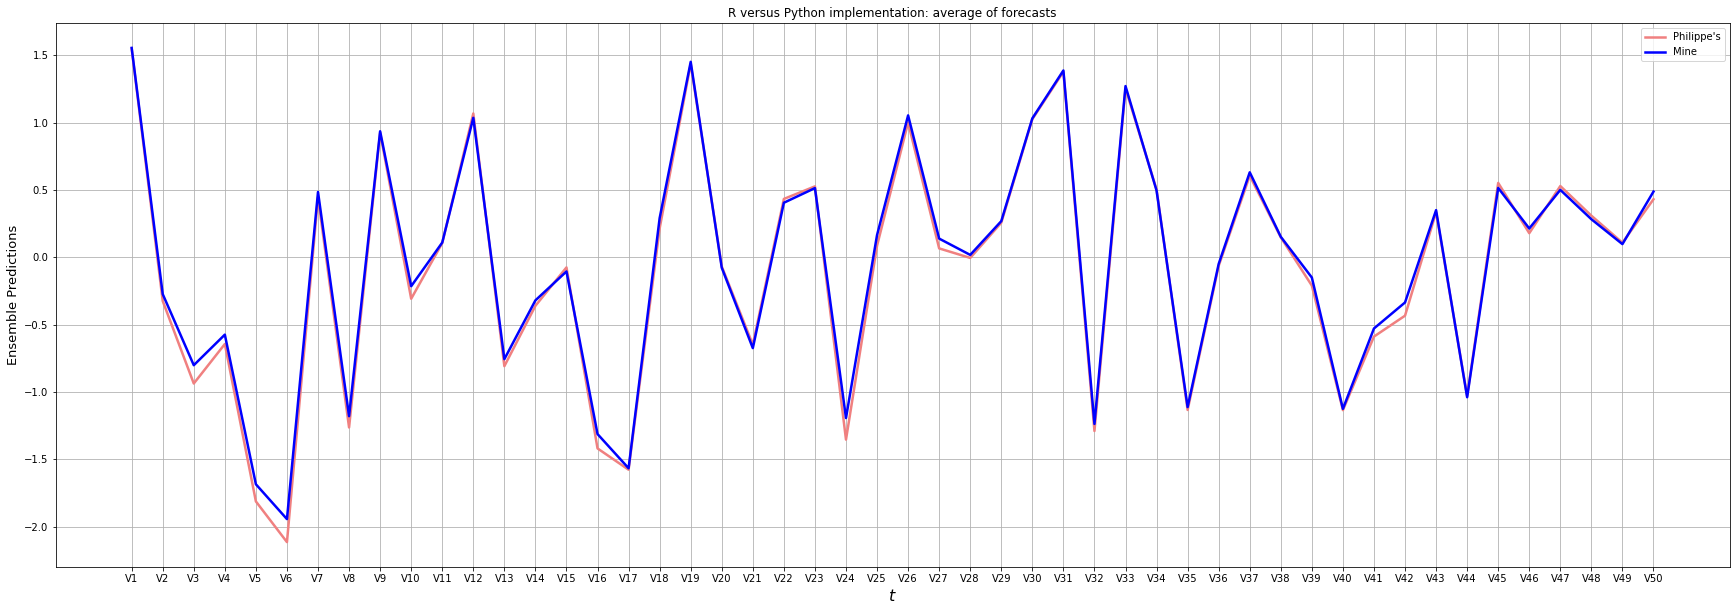

In [ ]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15, 8)
ax.plot(phils_preds.mean(axis =0), color = 'lightcoral', linewidth = 2.5, label = "Philippe's")

ax.plot(my_preds.mean(axis = 0), color = 'blue', linewidth = 2.5, label = "Mine")

# ax.plot(y, label = 'actual', color = 'magenta', linewidth = 2.5)
ax.legend()
ax.set_ylabel("Ensemble Predictions", fontsize = 13)
ax.grid()
ax.set_xlabel(r"$t$", fontsize = 16)
ax.set_title("R versus Python implementation: average of forecasts")
# ax.plot(y, color = 'green', linewidth = 3)

In [ ]:
beta_draws = np.stack(
            [np.zeros(shape=(3,3))]*2)

In [ ]:
beta_draws[2]

IndexError: index 2 is out of bounds for axis 0 with size 2